In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [4]:
for sectnum in range(1,8):
    coords=pd.read_csv('F:/Visium/LNG3_P583/Section'+str(sectnum)+'/583_LNG3_'+str(sectnum)+'_coords.csv')
    stereoscope=pd.read_csv('F:/Visium/LNG3_P583/Section'+str(sectnum)+'/583_LNG3_'+str(sectnum)+'_stereoscope.csv',index_col=0).transpose()
    coords['sample']=str(sectnum)
    adata=sc.AnnData(stereoscope)
    adata.obs=coords
    #adata.obs['name']=adata.obs['name'].astype(str)
    #adata.obs["name"]=adata.obs["name"].astype('category')
    adata.obsm["spatial"]=np.array([adata.obs.pixel_x,adata.obs.pixel_y]).transpose().astype('float64')
    #    sq.gr.spatial_neighbors(adata, spatial_key='spatial',radius=20)
    try: 
        adatall=sc.concat([adatall,adata],join='outer')
    except:
        adatall=adata

C:\Users\sergio.salas\Miniconda3\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [5]:
adatall.obs.index=adatall.obs.index.astype(str)

In [5]:
adatall.write('F:/Visium/adata_583B_LNG3.h5ad')

... storing 'Unnamed: 0' as categorical
... storing 'sample' as categorical


In [32]:

col=pd.read_csv('F:/ISS/annotations_dicts/colors_celltype_annotated_general.csv',sep=';')
coldict=dict(zip(col['celltype_annotated_general'].astype(str),col['colors']))
coldict['SMG intermediate']='blue'


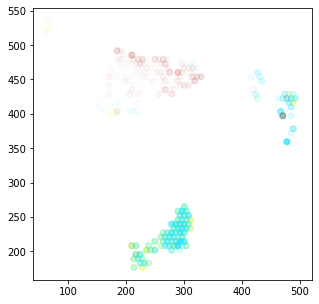

In [41]:
cts=['AT1','AT2','Basal']
plt.figure(figsize=(5,5))
for ct in cts:
    plt.scatter(smp.obs['pixel_x'],smp.obs['pixel_y'],alpha=ss[ct],c=coldict[ct])

NameError: name 'ct' is not defined

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(10)
y = np.arange(10)

alphas = np.linspace(0.1, 1, 10)

plt.scatter(x, y, alpha=alphas)
plt.show()

In [11]:
adatall.var


""
AT1
AT2
B-mature
B-naive
B-plasma-IgA
...
VE-capillary
VE-pulmonary-arterial
VE-pulmonary-venous
VE-systemic-arterial


In [36]:
sc.pp.filter_cells(adata,min_genes=3)
adata.raw=adata
sc.pp.normalize_total(adata, target_sum=100)
sc.pp.log1p(adata)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [37]:

sc.pp.neighbors(adata, n_neighbors=15, n_pcs=0)
sc.tl.leiden(adata,resolution=0.9,key_added='leiden_0.9')
sc.tl.umap(adata,min_dist=0.05)

... storing 'Unnamed: 0' as categorical
... storing 'sample' as categorical


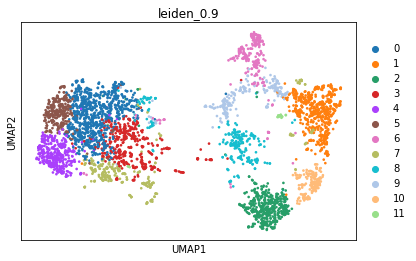

In [38]:
sc.pl.umap(adata,color='leiden_0.9')

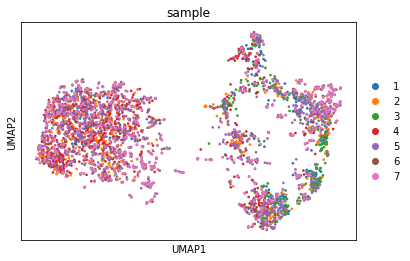

In [40]:
sc.pl.umap(adata,color='sample')

In [45]:
def map_of_clusters(adata,key='leiden',clusters='all',size=8,background='white',figuresize=(10,7),save=None,format='pdf'):
    
    #PARAMETERS TO MODIFY:
    #-key: the terms in adata.obs that you want to plot
    #-clusters:'all' for plotting all clusters in a single plot, 'individual': for plots of individual genes, or ['3','5'] (your groups
    #          between square brackets to plot only some clusters
    #-size: to change the size of your spots
    #-background: to change the color of the background
    #-figuresize: to specify the size of your figure
    #-save: if you want to save your figure, give the PATH of the folder where you want to save it
    #-format: specify the format in which you want to save your figure
    
    try:
        adata.obs[key]=adata.obs[key].astype(int)
        colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))
    except:
        colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))
    #cl.apply(lambda x: colors[x])
    plt.rcParams['figure.facecolor'] = background
    if clusters=='all':
        cl=adata.obs[key]
        plt.figure(figsize=figuresize)
        figa=plt.scatter(x=adata.obs.X,y=adata.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
        plt.axis('off')
        if not save==None:
            plt.savefig(save +'/map_all_clusters_'+str(size)+'_'+background+'_'+key+'.'+format)
    elif clusters=='individual':
        cl=adata.obs[key]
        for each in adata.obs[key].unique():
            adatasub=adata[adata.obs[key]==each]
            plt.figure(figsize=figuresize)
            plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)
            cl=adatasub.obs[key]
            plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
            plt.axis('off')
            plt.title('Group: '+ str(each))
            if not save==None:
                plt.savefig(save +'/map_inidivdual_cluster_'+str(each)+'_'+str(size)+background+'_'+key+'.'+format)
    else:
        adatasub=adata[adata.obs[key].isin(clusters)]
        plt.figure(figsize=figuresize)
        plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)
        cl=adatasub.obs[key]
        plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
        plt.axis('off')
        plt.legend()
        if not save==None:
                s=''
                for element in clusters:
                    s=s+str(element)
                print(s)
                plt.savefig(save +'/map_group_of_clusters_'+str(s)+'_'+str(size)+background+'_'+key+'.'+format)
#        plt.title('Group: '+ paste(clusters))

In [46]:
adata.obs['X']=adata.obs['pixel_x']
adata.obs['Y']=adata.obs['pixel_y']

In [54]:
s

'1'

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


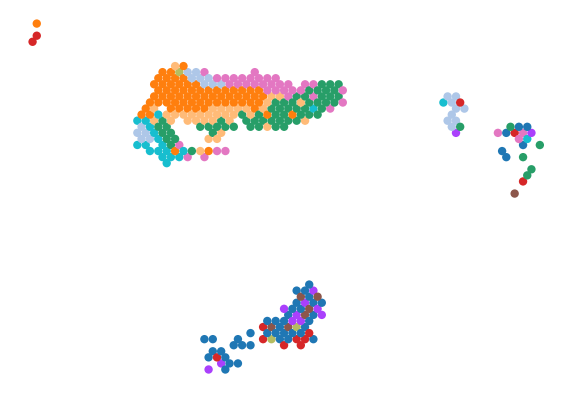

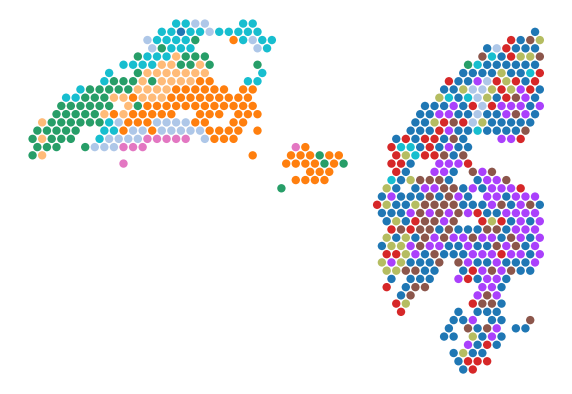

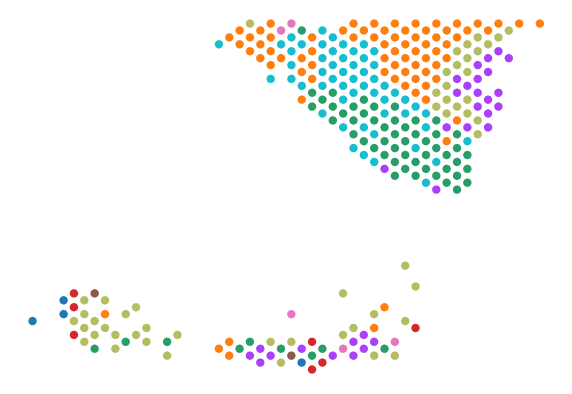

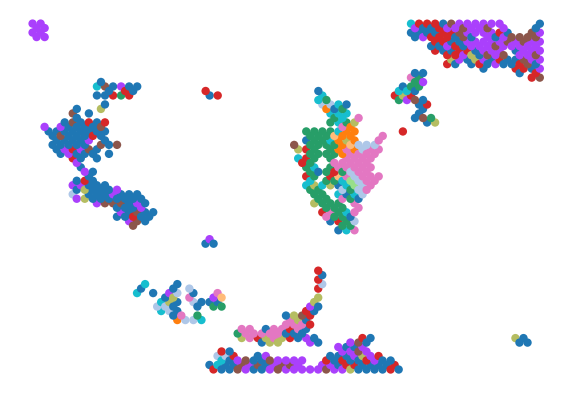

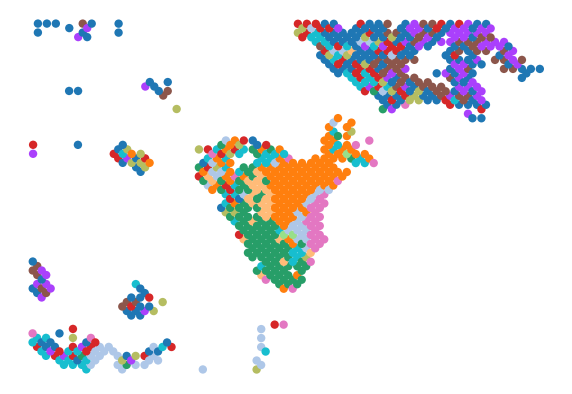

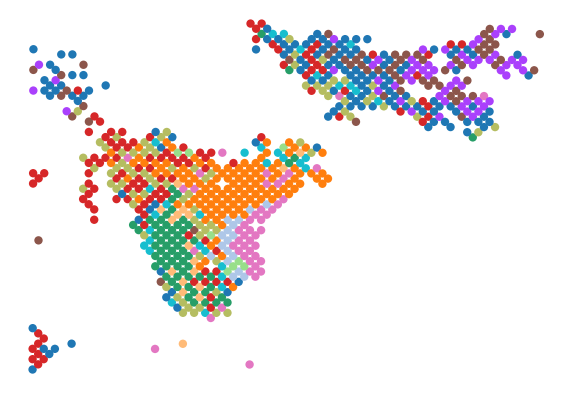

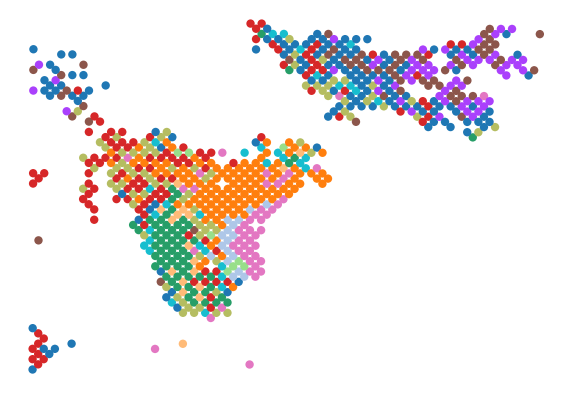

In [56]:
for s in adata.obs['sample'].unique():
    adatasub=adata[adata.obs['sample']==s]
    map_of_clusters(adatasub,key='leiden_0.9',clusters='all',size=70,background='white')
    adatasub.obs.to_csv('F:/Visium/'+str(s)+'.csv')

In [79]:
exp22=allstereo
coloc=pd.DataFrame(index=exp22.columns,columns=exp22.columns)
expressed_in=[]

for col in range(0,exp22.shape[1]):
    sele=list(exp22.iloc[:,col]>0.1)
    notsele=list(exp22.iloc[:,col]<0.1)
    expressed=exp22.loc[sele,:]
    notexpressed=exp22.loc[notsele,:]
    expressed_in.append(np.sum(sele))
    sele
    for second in range(0,expressed.shape[1]):
        try:
            coloc.iloc[col,second]=sum(expressed.iloc[:,second]>0.1)/expressed.shape[0]
        #try:
        #    anticoloc.iloc[col,second]=sum(notexpressed.iloc[:,second]>1)/notexpressed.shape[0]
        except:
            a=1
        #comparison.iloc[col,second]=(sum(expressed.iloc[:,second]>0)/expressed.shape[0])-(sum(notexpressed.iloc[:,second]>0)/notexpressed.shape[0])

In [80]:
celltype_exp=pd.DataFrame(expressed_in)
celltype_exp.index=exp22.columns

In [81]:
selcel=celltype_exp[celltype_exp[0]>20].index

In [82]:
coloc=coloc.loc[selcel,selcel]

In [83]:
coloc=coloc.astype(float)

In [84]:
coloc

,AT1,AT2,B-plasma-IgA,B-plasma-IgG,Basal,CD4,CD4-TRM/EMRA,CD8,Chondrocyte,Ciliated,...,SMG-Mucous,SMG-Serous,Secretory-Club,Secretory-Goblet,Suprabasal,VE-capillary,VE-pulmonary-arterial,VE-pulmonary-venous,VE-systemic-arterial,VE-systemic-venous
AT1,1.000000,0.920678,0.090847,0.079322,0.000678,0.005424,0.002034,0.002034,0.013559,0.004068,...,0.001356,0.008814,0.062373,0.016271,0.002712,0.006780,0.008136,0.008136,0.001356,0.007458
AT2,0.585597,1.000000,0.130660,0.112117,0.004743,0.005606,0.007331,0.001725,0.038810,0.017680,...,0.013368,0.011643,0.112980,0.020267,0.005175,0.010781,0.011212,0.009487,0.004743,0.016818
B-plasma-IgA,0.125704,0.284240,1.000000,0.099437,0.006567,0.000000,0.001876,0.001876,0.137899,0.058161,...,0.085366,0.308630,0.097561,0.020638,0.000938,0.004690,0.000938,0.000938,0.000938,0.026266
B-plasma-IgG,0.248408,0.552017,0.225053,1.000000,0.004246,0.000000,0.006369,0.006369,0.091295,0.025478,...,0.036093,0.097665,0.152866,0.033970,0.010616,0.000000,0.000000,0.010616,0.004246,0.044586
Basal,0.025641,0.282051,0.179487,0.051282,1.000000,0.076923,0.000000,0.025641,0.179487,0.410256,...,0.076923,0.051282,0.102564,0.179487,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000
CD4,0.242424,0.393939,0.000000,0.000000,0.090909,1.000000,0.030303,0.000000,0.030303,0.060606,...,0.060606,0.060606,0.181818,0.060606,0.090909,0.030303,0.060606,0.030303,0.000000,0.000000
CD4-TRM/EMRA,0.125000,0.708333,0.083333,0.125000,0.000000,0.041667,1.000000,0.000000,0.166667,0.041667,...,0.041667,0.000000,0.083333,0.041667,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000
CD8,0.142857,0.190476,0.095238,0.142857,0.047619,0.000000,0.000000,1.000000,0.380952,0.190476,...,0.142857,0.095238,0.190476,0.142857,0.047619,0.000000,0.000000,0.000000,0.000000,0.095238
Chondrocyte,0.030581,0.137615,0.224771,0.065749,0.010703,0.001529,0.006116,0.012232,1.000000,0.051988,...,0.062691,0.217125,0.119266,0.022936,0.006116,0.007645,0.009174,0.003058,0.009174,0.012232
Ciliated,0.016484,0.112637,0.170330,0.032967,0.043956,0.005495,0.002747,0.010989,0.093407,1.000000,...,0.046703,0.052198,0.093407,0.324176,0.140110,0.000000,0.000000,0.002747,0.005495,0.005495


<AxesSubplot:>

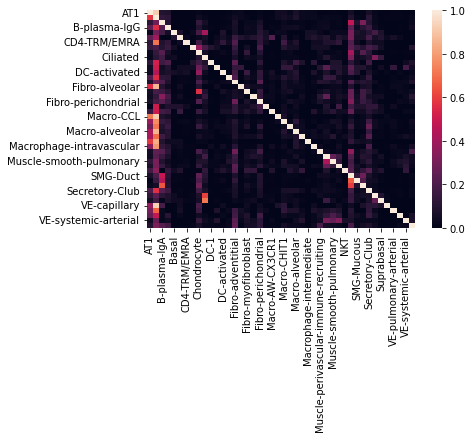

In [85]:
import seaborn as sns
sns.heatmap(coloc,vmax=1)

In [86]:
input_data

,AT1,AT2,B-mature,B-plasma-IgA,B-plasma-IgG,Basal,CD4,CD4-TRM/EMRA,CD8,CD8-GZMK+,...,SMG-Serous,Secretory-Club,Secretory-Goblet,Suprabasal,VE-alveolar-capillary-Car4-aerocyte,VE-capillary,VE-pulmonary-arterial,VE-pulmonary-venous,VE-systemic-arterial,VE-systemic-venous
AT1,0.000000,0.920678,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AT2,0.585597,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
B-mature,0.000000,0.636364,0.0,0.000000,0.0,0.0,0.272727,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.272727
B-plasma-IgA,0.000000,0.284240,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.308630,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
B-plasma-IgG,0.248408,0.552017,0.0,0.225053,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Basal,0.000000,0.282051,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
CD4,0.242424,0.393939,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
CD4-TRM/EMRA,0.000000,0.708333,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
CD8,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
CD8-GZMK+,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [98]:
colocnew=coloc.loc[coloc.columns[~coloc.columns.isin(['Mast-cell'])],coloc.columns[~coloc.columns.isin(['Mast-cell'])]]

In [99]:
adata

AnnData object with n_obs × n_vars = 4295 × 61
    obs: 'Unnamed: 0', 'pixel_x', 'pixel_y', 'sample', 'n_genes', 'leiden_0.9', 'X', 'Y'
    uns: 'log1p', 'neighbors', 'leiden', 'umap', 'leiden_0.9_colors', 'sample_colors'
    obsm: 'spatial', 'X_umap'
    obsp: 'distances', 'connectivities'

In [100]:
for coln in colocnew.columns:
    colocnew.loc[coln,coln]=0

In [101]:
import pandas as pd
import networkx as nx
input_data =colocnew
input_data[input_data<0.15]=0


G = nx.DiGraph(input_data)

In [102]:
from pyvis.network import Network

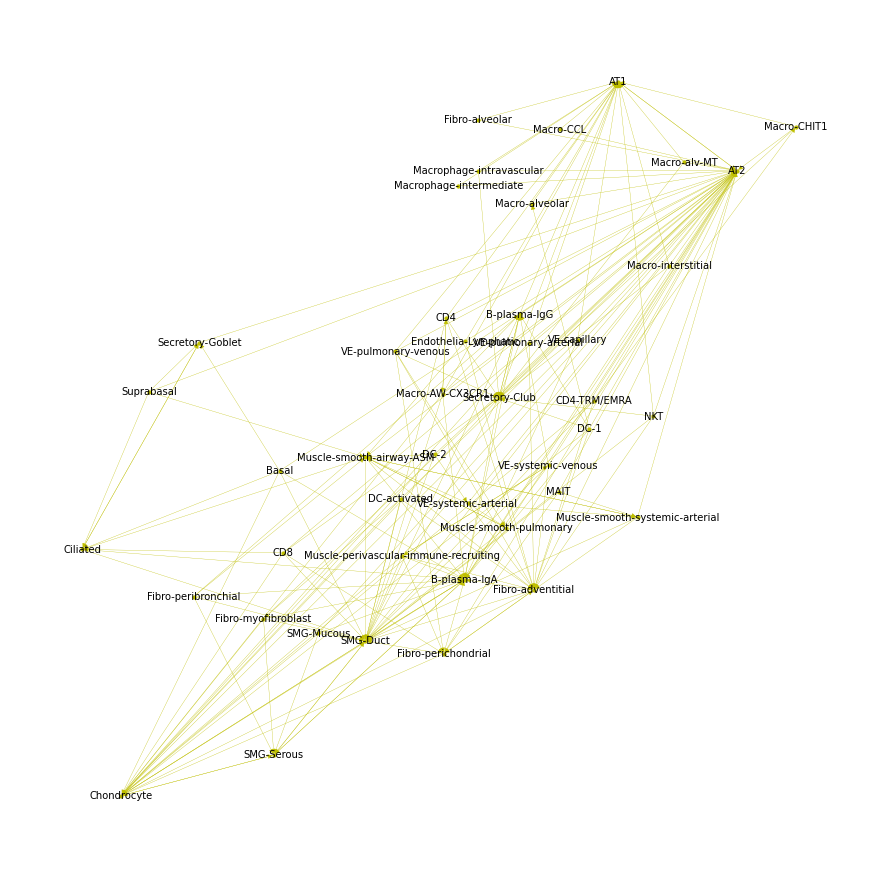

In [107]:
plt.figure(figsize=(12,12))
e=nx.draw(G,with_labels=True,node_size=10,node_color='y',edge_color='y',width=0.3,font_size=10)
plt.savefig(r'F:/Visium/583B_visium_coloc.pdf')

In [87]:
nt = Network('500px', '500px')
nt.from_nx(G)
nt.show_buttons(filter_=['physics'])
nt.show('nx.html')

In [106]:
adatasub=adata[adata.obs['sample']==0]

In [111]:
adatasub

View of AnnData object with n_obs × n_vars = 0 × 61
    obs: 'Unnamed: 0', 'pixel_x', 'pixel_y', 'sample'
    obsm: 'spatial'

In [113]:
plt.scatter(adatasub.obs.pixel_x,adatasub.obs.pixel_y,c=adatasub.obsAT1)

AttributeError: 'AnnData' object has no attribute 'obsAT1'